# MARKET BASKET ANALYSIS


## OBJECTIVE
The goal of this project is to introduce you to the concept of market basket analysis, which is a crucial aspect of data science in retail and e-commerce. You will learn how to extract valuable insights from transaction data, understand customer purchasing behaviour, and use this knowledge for business optimization.Click for dataset


## TOOLS USED
* Data Analysis Tool (Python: using Libries such Pandas)
* Data Visualisation such Matplotlib
* Scikit-Learn
* Jupyter Notebook

1. Data Preparation
2.Exploratory Data Analysis (EDA)
3.Market Basket Analysis
4.Visualization
5.Interpretation and Insights
6.Recommendations
7.Presentation

Deliverables:•
A  well-documented  Jupyter  Notebook  or  report  containing  code  and explanations.
•Visualizations that support your findings.
•A presentation or report for your mentorship group.
•A GitHub repository with documentation and code.



In [1]:
# IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')




In [2]:
# Import the Operating System

import os 
path= "/Users\BUNMI\Documents\Flit Project 1"
os.chdir(path)
os.getcwd()



'c:\\Users\\BUNMI\\Documents\\Flit Project 1'

## Data Preparation
1. Loading data from source-Desktop
2. Viewing Top 10 Data 
3. Checking Total number of Row& Column,Datatypes
4. checking missing Value

In [3]:
# LOAD DATASET USING PANDAS
data= pd.read_csv("Market Basket Analysis - Groceries_dataset.csv")


#checking at the first few rows of the dataset to get a sense of its structure
data.head(10)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


#### Understanding the Data

In [4]:
# what's the size of the dataset
data_size = data.shape

print(f'This dataset contain {data_size} rows and column respectively')

This dataset contain (38765, 3) rows and column respectively


In [5]:
# provide Additional Information of the dataset showing datatype of each Column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [6]:
# Identify missing values in the dataset.
missing_value = data.isnull().sum()

if missing_value == 0:
    print('There is no missing value')
    

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Data Cleaning 

1. This Date was converted from Object to Date Timestamp
2. The 759 was drop from the Dataset 
3. No Null value in the Dataset


In [8]:
data.duplicated().value_counts()

False    38006
True       759
dtype: int64

In [9]:
#Checking for the Total duplicate Values
duplicate = data.duplicated().sum()

#Display the result
print(f'Total duplicate value is: {duplicate}')

Total duplicate value is: 759


In [10]:
# Removing Duplicate value which is 759 to ensure the data is properly clean
Clean_data = data.drop_duplicates()

#Check the count of the Clean Data
Clean_data.shape

(38006, 3)

In [11]:
#Converting Date Column From Object Data to Time stamp
Clean_data['Date'] = pd.to_datetime(Clean_data['Date'])

# Check for the types of variables (numeric, categorical, etc.)
Clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38006 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38006 non-null  int64         
 1   Date             38006 non-null  datetime64[ns]
 2   itemDescription  38006 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.2+ MB


In [12]:
# Getting basic statistics for the variable- Member Number (mean, median, standard deviation, etc.).

Clean_data['Member_number'].describe()

count    38006.000000
mean      3003.361390
std       1153.659151
min       1000.000000
25%       2001.000000
50%       3005.000000
75%       4007.000000
max       5000.000000
Name: Member_number, dtype: float64

## Exploratory Data Analysis (EDA)

In [13]:
# Checking for Item sold per day
items_sold_Eachday = Clean_data.groupby('Date')['itemDescription'].value_counts()

# Display the result
print(f'Items Bought for Each day: {items_sold_Eachday}')



Items Bought for Each day: Date        itemDescription   
2014-01-01  bottled water         4
            yogurt                4
            frozen vegetables     3
            hamburger meat        3
            other vegetables      3
                                 ..
2015-12-30  rubbing alcohol       1
            sausage               1
            tropical fruit        1
            turkey                1
            whipped/sour cream    1
Name: itemDescription, Length: 25231, dtype: int64


In [14]:
Clean_data.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [15]:
# The Item most purchase in the data
item_count= data['itemDescription'].value_counts()

# print out each Item with the number bought
print(item_count)

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64


In [17]:
Clean_data['Member_number'].value_counts().head(20)

3180    35
3737    33
3050    32
2051    31
3915    30
2433    30
2625    30
2851    29
2394    29
3872    29
3308    28
4338    28
1379    28
2271    28
3289    28
4875    28
2193    27
2517    26
2524    26
1052    26
Name: Member_number, dtype: int64

<AxesSubplot:xlabel='Member_number', ylabel='Count'>

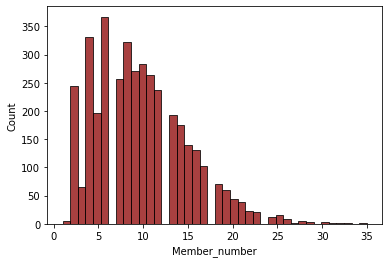

In [18]:
#For numeric variables, create histograms, box plots, and summary statistics.
(sns.histplot(Clean_data['Member_number'].value_counts(),kde =False,color = 'darkred',bins = 40))

In [31]:
# for more complex aggregations or when you need to group data based on multiple criteria and perform operations on those groups.
group_member = Clean_data.groupby(['Member_number','itemDescription','Date']).count()

group_member

Empty DataFrame
Columns: []
Index: [(1000, canned beer, 2015-07-24 00:00:00), (1000, hygiene articles, 2015-11-25 00:00:00), (1000, misc. beverages, 2015-07-24 00:00:00), (1000, pastry, 2014-06-24 00:00:00), (1000, pickled vegetables, 2015-05-27 00:00:00), (1000, salty snack, 2014-06-24 00:00:00), (1000, sausage, 2015-03-15 00:00:00), (1000, sausage, 2015-11-25 00:00:00), (1000, semi-finished bread, 2015-03-15 00:00:00), (1000, soda, 2015-05-27 00:00:00), (1000, whole milk, 2014-06-24 00:00:00), (1000, whole milk, 2015-03-15 00:00:00), (1000, yogurt, 2015-03-15 00:00:00), (1001, beef, 2015-04-14 00:00:00), (1001, curd, 2015-02-05 00:00:00), (1001, frankfurter, 2015-01-20 00:00:00), (1001, frankfurter, 2015-02-05 00:00:00), (1001, rolls/buns, 2014-07-02 00:00:00), (1001, sausage, 2014-07-02 00:00:00), (1001, soda, 2014-12-12 00:00:00), (1001, soda, 2015-01-20 00:00:00), (1001, whipped/sour cream, 2015-01-20 00:00:00), (1001, white bread, 2015-04-14 00:00:00), (1001, whole milk, 2014-07-02 00:00:00), (1001, whole milk, 2014-12-12 00:00:00), (1002, butter, 2014-04-26 00:00:00), (1002, butter milk, 2015-08-30 00:00:00), (1002, frozen vegetables, 2014-09-02 00:00:00), (1002, other vegetables, 2014-09-02 00:00:00), (1002, specialty chocolate, 2015-08-30 00:00:00), (1002, sugar, 2015-04-26 00:00:00), (1002, tropical fruit, 2015-04-26 00:00:00), (1002, whole milk, 2014-04-26 00:00:00), (1003, dental care, 2014-01-19 00:00:00), (1003, detergent, 2014-10-15 00:00:00), (1003, frozen meals, 2014-01-19 00:00:00), (1003, rolls/buns, 2014-02-27 00:00:00), (1003, rolls/buns, 2015-10-02 00:00:00), (1003, root vegetables, 2014-10-15 00:00:00), (1003, sausage, 2015-10-02 00:00:00), (1004, canned beer, 2014-01-07 00:00:00), (1004, chocolate, 2014-10-06 00:00:00), (1004, chocolate, 2014-10-13 00:00:00), (1004, cling film/bags, 2014-01-05 00:00:00), (1004, dish cleaner, 2014-01-05 00:00:00), (1004, frozen fish, 2014-01-07 00:00:00), (1004, hygiene articles, 2015-02-12 00:00:00), (1004, other vegetables, 2014-10-07 00:00:00), (1004, other vegetables, 2015-02-12 00:00:00), (1004, packaged fruit/vegetables, 2014-10-13 00:00:00), (1004, pastry, 2014-08-19 00:00:00), (1004, pip fruit, 2014-04-02 00:00:00), (1004, red/blush wine, 2014-10-06 00:00:00), (1004, rolls/buns, 2014-10-06 00:00:00), (1004, rolls/buns, 2014-10-13 00:00:00), (1004, root vegetables, 2014-08-19 00:00:00), (1004, shopping bags, 2014-10-07 00:00:00), (1004, tropical fruit, 2014-04-02 00:00:00), (1004, whole milk, 2014-04-02 00:00:00), (1004, whole milk, 2014-08-19 00:00:00), (1004, whole milk, 2014-10-13 00:00:00), (1005, margarine, 2014-01-23 00:00:00), (1005, rolls/buns, 2014-09-01 00:00:00), (1005, whipped/sour cream, 2014-01-23 00:00:00), (1006, bottled beer, 2015-06-14 00:00:00), (1006, bottled water, 2014-05-07 00:00:00), (1006, chicken, 2015-06-14 00:00:00), (1006, chocolate, 2015-06-14 00:00:00), (1006, flour, 2015-06-14 00:00:00), (1006, frankfurter, 2015-06-14 00:00:00), (1006, rice, 2014-09-04 00:00:00), (1006, rolls/buns, 2014-05-07 00:00:00), (1006, rolls/buns, 2015-06-14 00:00:00), (1006, shopping bags, 2014-11-07 00:00:00), (1006, skin care, 2014-11-07 00:00:00), (1006, softener, 2014-05-07 00:00:00), (1006, whole milk, 2014-09-04 00:00:00), (1006, whole milk, 2015-06-14 00:00:00), (1008, dessert, 2015-03-10 00:00:00), (1008, domestic eggs, 2015-07-21 00:00:00), (1008, hamburger meat, 2015-03-10 00:00:00), (1008, liquor (appetizer), 2015-03-10 00:00:00), (1008, liver loaf, 2015-03-10 00:00:00), (1008, photo/film, 2015-07-21 00:00:00), (1008, root vegetables, 2015-07-21 00:00:00), (1008, soda, 2015-07-21 00:00:00), (1008, tropical fruit, 2015-07-21 00:00:00), (1008, white wine, 2015-07-21 00:00:00), (1008, yogurt, 2015-07-21 00:00:00), (1009, canned fish, 2014-01-24 00:00:00), (1009, cocoa drinks, 2014-01-24 00:00:00), (1009, herbs, 2015-05-10 00:00:00), (1009, ketchup, 2015-09-23 00:00:00), (1009, newspapers, 2015-05-10 00:00:00), (1009, pastry, 2015-09-23 00:00:00), (1

<AxesSubplot:xlabel='Member_number', ylabel='Date'>

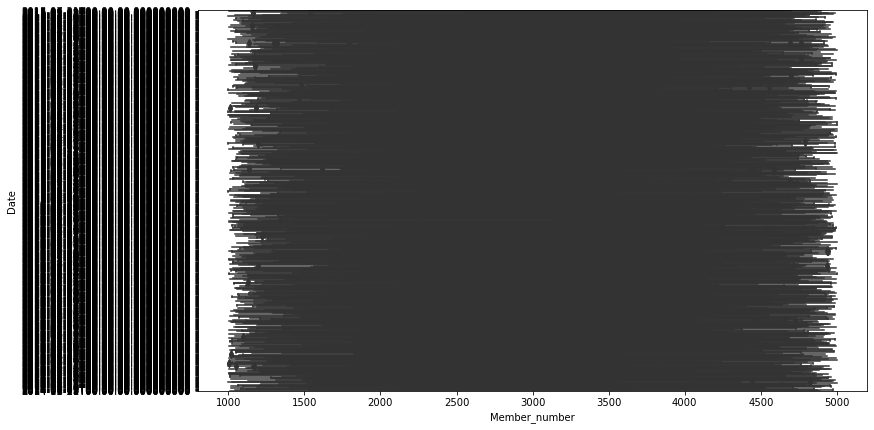

In [38]:
# Identify and analyze outliers in the data.

#Box plots, scatter plots, or statistical methods can help in identifying outliers.


plt.figure(figsize=(12,7))
sns.boxplot(x ='Member_number', y ='Date',data =Clean_data,palette= 'winter')

In [36]:
group_member2 = Clean_data.groupby(['Member_number','itemDescription']).sum()

group_member2

Empty DataFrame
Columns: []
Index: [(1000, canned beer), (1000, hygiene articles), (1000, misc. beverages), (1000, pastry), (1000, pickled vegetables), (1000, salty snack), (1000, sausage), (1000, semi-finished bread), (1000, soda), (1000, whole milk), (1000, yogurt), (1001, beef), (1001, curd), (1001, frankfurter), (1001, rolls/buns), (1001, sausage), (1001, soda), (1001, whipped/sour cream), (1001, white bread), (1001, whole milk), (1002, butter), (1002, butter milk), (1002, frozen vegetables), (1002, other vegetables), (1002, specialty chocolate), (1002, sugar), (1002, tropical fruit), (1002, whole milk), (1003, dental care), (1003, detergent), (1003, frozen meals), (1003, rolls/buns), (1003, root vegetables), (1003, sausage), (1004, canned beer), (1004, chocolate), (1004, cling film/bags), (1004, dish cleaner), (1004, frozen fish), (1004, hygiene articles), (1004, other vegetables), (1004, packaged fruit/vegetables), (1004, pastry), (1004, pip fruit), (1004, red/blush wine), (1004, rolls/buns), (1004, root vegetables), (1004, shopping bags), (1004, tropical fruit), (1004, whole milk), (1005, margarine), (1005, rolls/buns), (1005, whipped/sour cream), (1006, bottled beer), (1006, bottled water), (1006, chicken), (1006, chocolate), (1006, flour), (1006, frankfurter), (1006, rice), (1006, rolls/buns), (1006, shopping bags), (1006, skin care), (1006, softener), (1006, whole milk), (1008, dessert), (1008, domestic eggs), (1008, hamburger meat), (1008, liquor (appetizer)), (1008, liver loaf), (1008, photo/film), (1008, root vegetables), (1008, soda), (1008, tropical fruit), (1008, white wine), (1008, yogurt), (1009, canned fish), (1009, cocoa drinks), (1009, herbs), (1009, ketchup), (1009, newspapers), (1009, pastry), (1009, tropical fruit), (1009, yogurt), (1010, UHT-milk), (1010, bottled water), (1010, candles), (1010, coffee), (1010, frankfurter), (1010, kitchen towels), (1010, pip fruit), (1010, rolls/buns), (1010, sliced cheese), (1010, specialty bar), (1011, bottled water), (1011, candles), (1011, candy), (1011, citrus fruit), (1011, curd cheese), (1011, frankfurter), ...]

[34766 rows x 0 columns]

### For numeric variables, create histograms, box plots, and summary statistics.

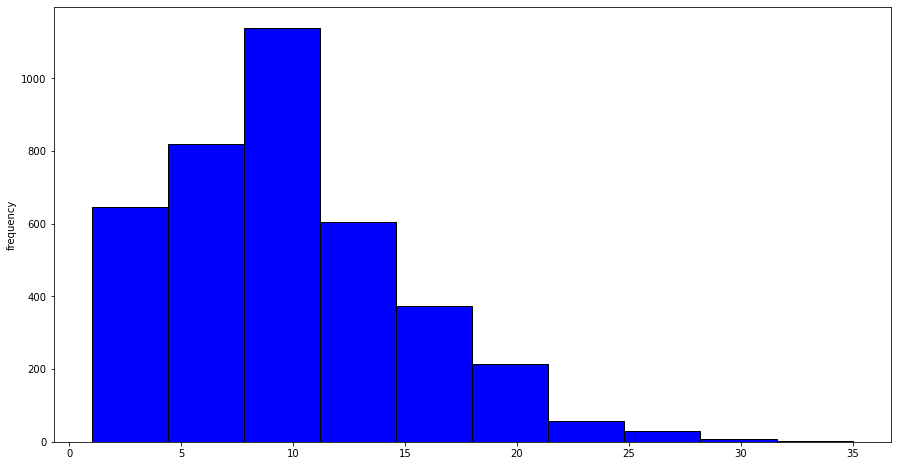

In [24]:


# Plotting the histogram to check summary of the frequency distribution of the member number in a single column
plt.figure(figsize =(15,8))
# Plotting the histogram
plt.hist(Clean_data['Member_number'].value_counts(),bins =10, color ='blue',edgecolor ='black')

# Adding labels and title
plt.xlabel('')
plt.ylabel('frequency')
plt.title('')

#  Display the plot
plt.show()

In [ ]:
group_items = Clean_data.groupby('itemDescription')

group_items.size()

itemDescription
Instant food products     60
UHT-milk                 320
abrasive cleaner          22
artif. sweetener          29
baby cosmetics             3
bags                       4
baking powder            121
bathroom cleaner          17
beef                     508
berries                  326
beverages                248
bottled beer             678
bottled water            908
brandy                    38
brown bread              563
butter                   527
butter milk              263
cake bar                  92
candles                   66
candy                    215
dtype: int64

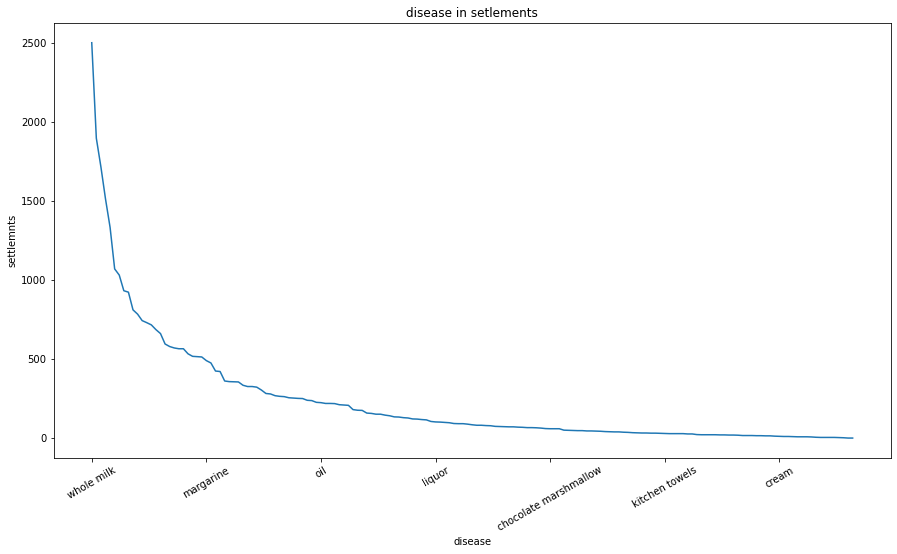

In [ ]:
plt.figure(figsize =(15,8))
data['itemDescription'].value_counts().sort_values(ascending = False).plot()
plt.xticks(rotation = 30)
plt.xlabel('disease')
plt.ylabel('settlemnts')
plt.title('disease in setlements')
plt.show()

In [ ]:
Plot = Clean_data.plot.bar(figsize=(15,30))
plt.xlabel('itemDescription')
plt.ylabel('itemDescription')
plt.title('Count of Each Item')
plt.show();

plt.figure(figsize= 15,8)

SyntaxError: positional argument follows keyword argument (3739891892.py, line 7)

In [ ]:
data['itemDescription'].is_unique()

TypeError: 'bool' object is not callable

In [ ]:
#Let's visualize the columns by plotting the charts
plt.figure(figsize =(20, 15))
sns.countplot(x = 'itemDescription',hue='Member_number' ,data = Clean_data, palette = 'Blues_r')

TypeError: 'module' object is not callable